#**House Price Prediction**
##**Kaggle's House Prices - Advanced Regression Techniques**
In this competition, participants were asked to predict the sales price of a dataset of houses using different variables like overall quality, year built, total rooms above grade, garage type, and so on. Let's take a step-by-step procedure through the analysis.

In [35]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

**There are two datasets for this prompt: train and test**. This means that participants would have to build a model using the train dataset and make prediction using test.

In [36]:
#Load the dataset for train
df_train = pd.read_csv('train.csv')

##**Basic Data Info Check**

In [37]:
#Check the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [38]:
#Briefly overview how the data looks like
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Seems like there are columns with missing/empty values. We'll try working on these later.

##**Sales Price Statistics**
We have finished looking at general information on the overall training data. Now we will move on to looking at our main goal today: the SalePrice column.

In [39]:
#Take a look at sales price statistics
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Figure size 1000x800 with 0 Axes>

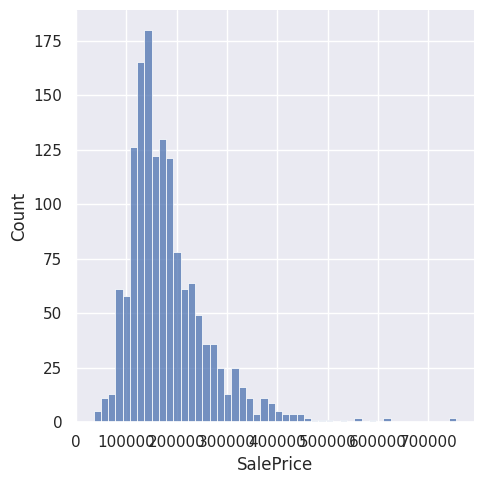

In [40]:
#Visualize it
plt.figure(figsize=(10, 8))
sns.displot(df_train['SalePrice'], bins=50);

As seen from the graph, the housing prices are skewed. We'll have to investigate where this skewness comes from. Let's make a heatmap to see the correlations.

##**Variables Correlation**

There are alot of variables presented out here. Let us zoom in for Sales Price and take a closer look for more detailed analysis.

In [41]:
#Convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


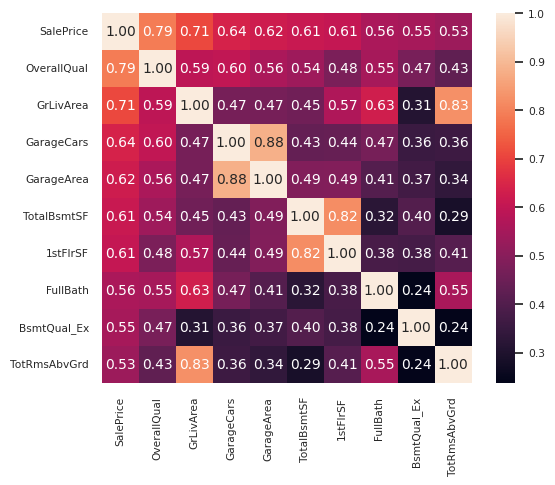

In [42]:
#Heatmap saleprice correlation matrix
#Select the top 10 features with the largest correlation coefficients with Sales Price
k = 10
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=0.7)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The top 5 most correlated variables to Sales Price are 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', and 'TotalBsmntSF'. However, since 'GarageCars', 'GarageArea' are connected, we'll only take a look at 'GarageCars' which has higher correlation. Also, 'TotalBsmtSF' and 'TotRmsAbvGrd' also relates, so we will tie them as one.

##**Outliers**

Now let's take a look at outliers and eliminate them if possible.

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

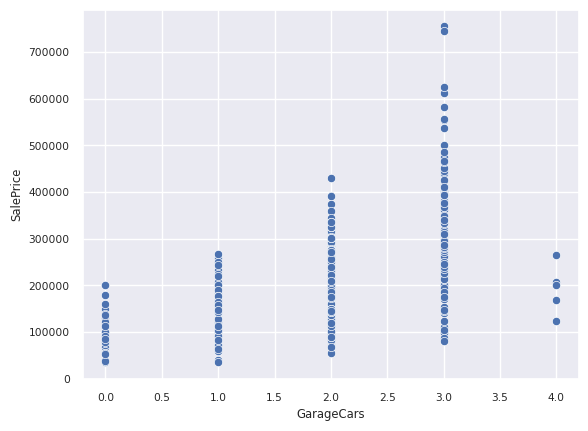

In [43]:
#Let's first take a look at 'GarageCars'
sns.scatterplot(x='GarageCars', y='SalePrice', data=df_train)

In [44]:
#Checking outliers
df_train.sort_values(by = 'GarageCars', ascending = False)[:5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1190,1191,190,NaN,32463,4,4,1961,1975,149.0,1159,...,0,0,0,1,0,0,0,0,1,0
420,421,90,78.0,7060,7,5,1997,1998,200.0,1309,...,0,0,0,1,0,0,1,0,0,0
1340,1341,20,70.0,8294,4,5,1971,1971,0.0,0,...,0,0,0,1,0,0,0,0,1,0
747,748,70,65.0,11700,7,7,1880,2003,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1350,1351,90,91.0,11643,5,5,1969,1969,368.0,500,...,0,0,0,1,0,0,0,0,1,0


In [45]:
df_train = df_train.drop(df_train[df_train['Id'] == 1191].index)
df_train = df_train.drop(df_train[df_train['Id'] == 1341].index)
df_train = df_train.drop(df_train[df_train['Id'] == 421].index)
df_train = df_train.drop(df_train[df_train['Id'] == 748].index)
df_train = df_train.drop(df_train[df_train['Id'] == 1351].index)

Let's take a look at other outliers too.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

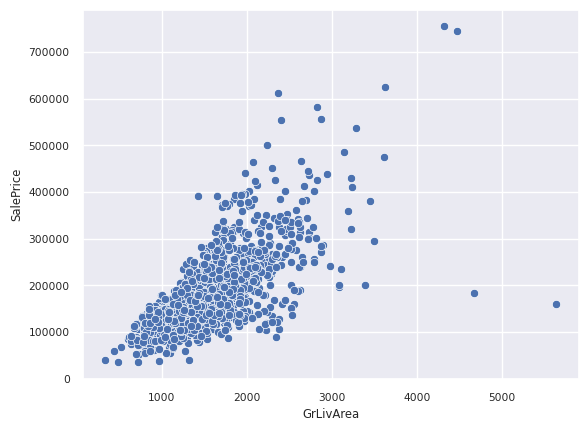

In [46]:
#'GrLivArea' outliers
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)

In [47]:
#Checking outliers
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1298,1299,60,313.0,63887,10,5,2008,2008,796.0,5644,...,0,1,0,0,0,0,0,0,0,1
523,524,60,130.0,40094,10,5,2007,2008,762.0,2260,...,0,1,0,0,0,0,0,0,0,1


In [48]:
#Remove outliers
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

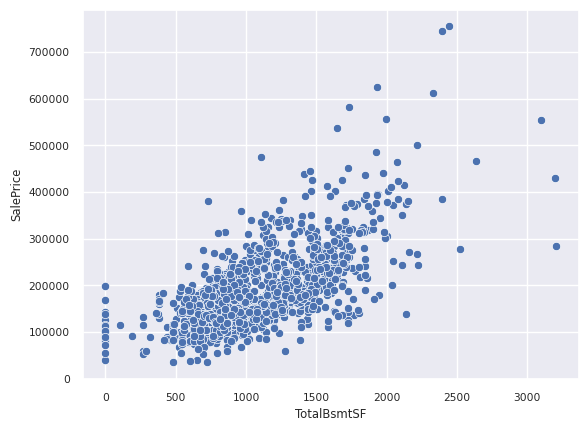

In [49]:
#'TotalBsmtSF' outliers
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_train)

In [50]:
#Checking outliers
df_train.sort_values(by ='TotalBsmtSF', ascending = False)[:2]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
332,333,20,85.0,10655,8,5,2003,2004,296.0,1124,...,0,0,0,1,0,0,0,0,1,0
496,497,20,NaN,12692,8,5,1992,1993,0.0,1231,...,0,0,0,1,0,0,0,0,1,0


In [51]:
#Checking outliers
df_train.sort_values(by ='TotalBsmtSF', ascending = True)[:5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
553,554,20,67.0,8777,4,5,1949,2003,0.0,0,...,0,0,0,1,0,0,0,0,1,0
778,779,90,60.0,8400,5,5,1977,1977,320.0,0,...,0,0,0,1,0,0,0,0,1,0
520,521,190,60.0,10800,4,7,1900,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
90,91,20,60.0,7200,4,5,1950,1950,0.0,0,...,0,0,0,1,0,0,0,0,1,0
371,372,50,80.0,17120,4,4,1959,1959,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
#Remove outliers
df_train = df_train.drop(df_train[df_train['Id'] == 333].index)
df_train = df_train.drop(df_train[df_train['Id'] == 497].index)
df_train = df_train.drop(df_train[df_train['Id'] == 737].index)
df_train = df_train.drop(df_train[df_train['Id'] == 393].index)
df_train = df_train.drop(df_train[df_train['Id'] == 40].index)
df_train = df_train.drop(df_train[df_train['Id'] == 869].index)
df_train = df_train.drop(df_train[df_train['Id'] == 1001].index)

Now that we eliminated some outliers, let's take a look at the overall scatterplots. Visualizations make analysis much clearer and easier.

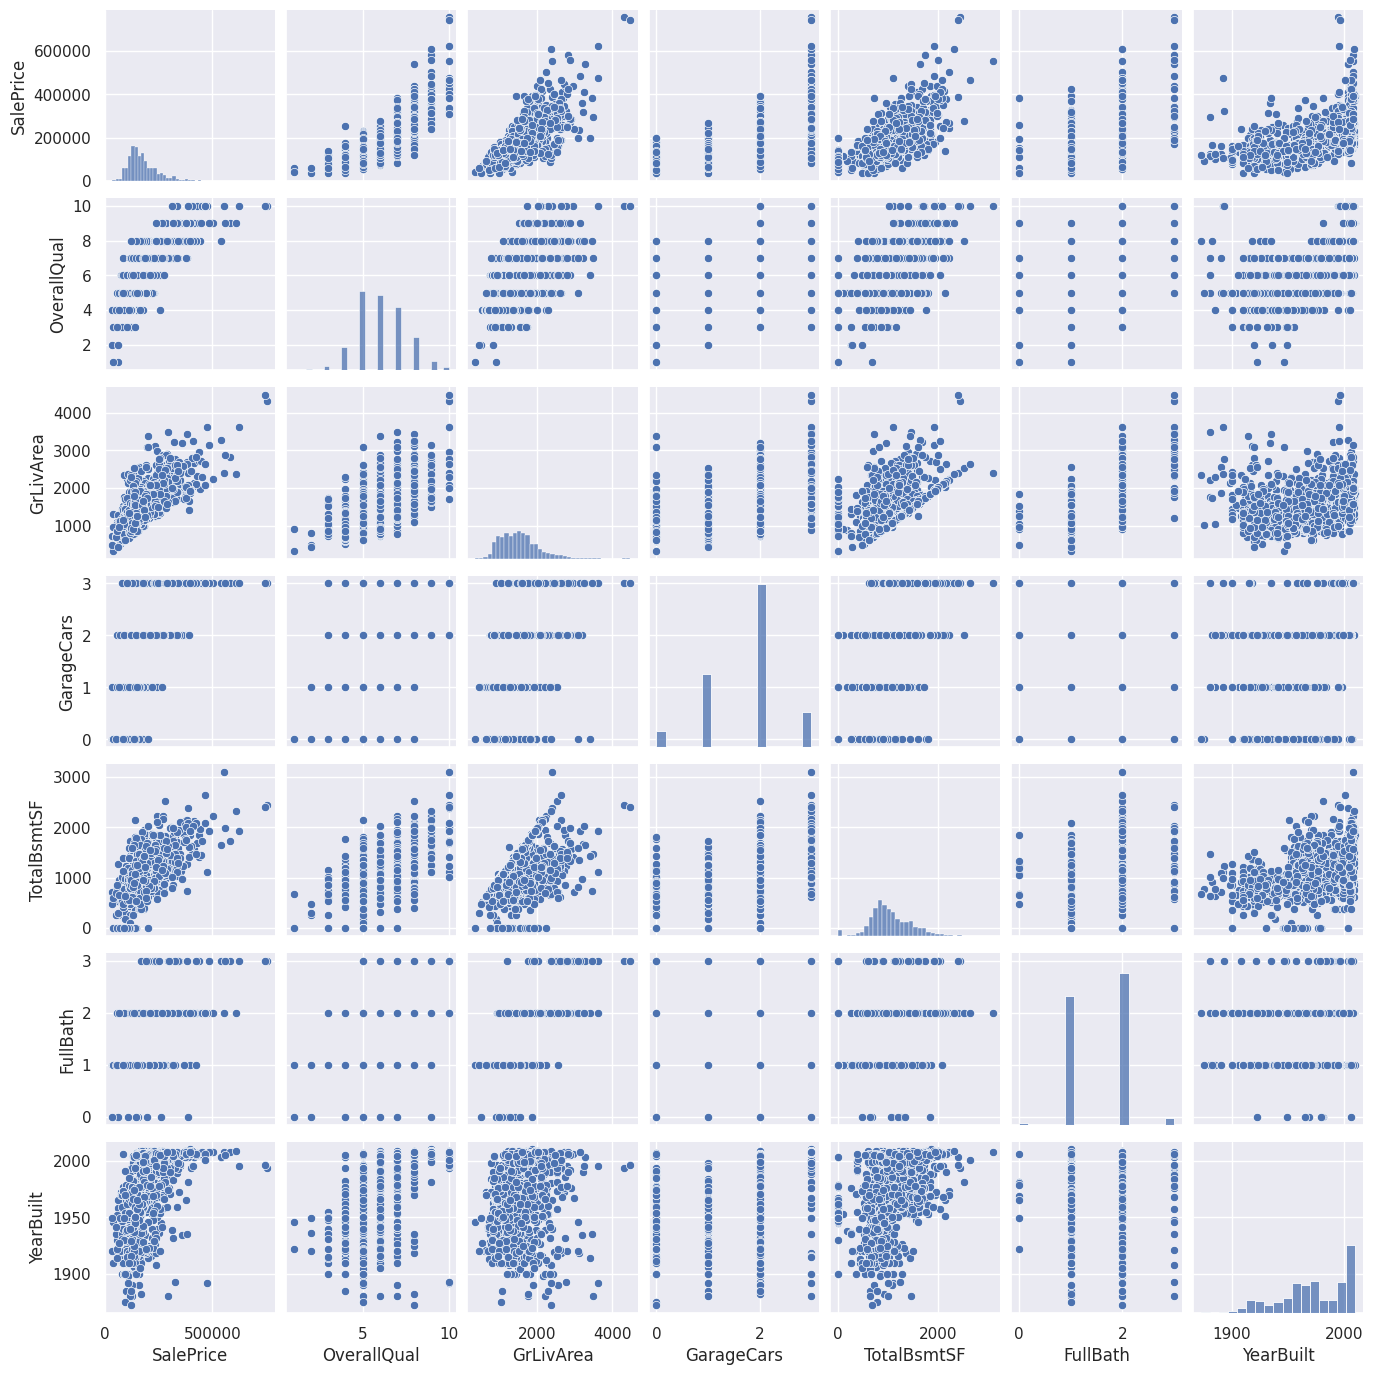

In [53]:
#Set of scatterplots
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2)
plt.show();

##**Empty/Missing Data**
Handling missing data is crucial in data analysis, as they cause a huge change in the overall dataset. Hence, we'll take a closer look at the missing data. Let's see how many NaN values there are.

In [54]:
#Total number of NaN values in train data set
total_nan = df_train.isna().sum().sum()
total_nan

343

There are still alot left. Let's replace them with the mean values of each column they belong to, so that they won't effect the overall mean of the column. We already changed all categorical values to dummies so let's replace all leftover NaN values with the mean value of column.

In [55]:
#Replace NaN with mean
df_train = df_train.fillna(df_train.mean())

Let's check how many NaN values are left.

In [56]:
#Recheck
total_nan = df_train.isna().sum().sum()
total_nan

0

All set! Let's move onto the most interesting part: modeling.

##**Random Forest**
I have chosen Random Forest Modeling for this problem. Linear regression is simple, but it might not catch complex patterns thus not suitable for housing prices which have quite variations. Decision trees may lead to unexpected overfitting. Thus, random forest was chosen since it has higher accuracy and is less likely to be overfit. It is also robust against outliers that we have possibly missed earlier.

We'll first split the training data into train and test (train_1) again to build the baseline model.

In [57]:
#Training data split
X = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y = df_train['SalePrice']

In [58]:
#Split the data again into training and testing (train_1) sets
X_train, X_train_1, y_train, y_train_1 = train_test_split(X, y, test_size=0.2, random_state=42)

Before fitting random forest model, let's see how many n_estimators to use.

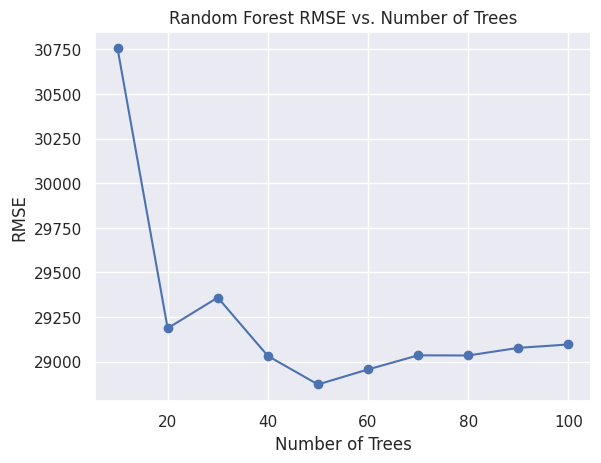

In [59]:
#Train random forest models with different numbers of trees
n_trees_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
rmse_values = []

for n_trees in n_trees_list:
    model = RandomForestRegressor(n_estimators=n_trees, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train_1)
    rmse = np.sqrt(mean_squared_error(y_train_1, y_pred))
    rmse_values.append(rmse)

#Plotting
plt.plot(n_trees_list, rmse_values, marker='o')
plt.title('Random Forest RMSE vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [60]:
optimal_model = RandomForestRegressor(n_estimators=50, random_state=42)
optimal_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

It seems like 50 is the best choice for n_estimators. Now let's see if our model works well by fitting in our temporary test data (train_1), before trying it on actual test data.



In [61]:
#Test the random forest model out
y_pred = optimal_model.predict(X_train_1)

In [62]:
#Let's see how it worked out
X_train_1_with_predictions = X_train_1.copy()
X_train_1_with_predictions['Predictions'] = y_pred

In [63]:
#Let's also add a column for Id since it's a bit confusing
X_train_1_with_predictions['Id'] = X_train_1_with_predictions.index + 1

In [64]:
#And here are the results
X_train_1_with_predictions

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Predictions,Id
416,6,1400,2,672,1,1978,156957.000000,417
317,8,1959,3,1088,2,2006,267144.000000,318
560,5,1392,2,1392,1,1957,154160.000000,561
66,7,2207,2,1947,2,1970,256076.740000,67
1394,7,1500,3,1356,2,2006,199867.566667,1395
...,...,...,...,...,...,...,...,...
87,6,1224,2,612,2,2009,163998.800000,88
1387,6,2526,1,714,2,1916,182348.000000,1388
266,6,1511,2,802,2,1997,178518.000000,267
602,8,1915,2,908,2,1992,213812.700000,603


Let's also take a look at root mean squared error.

In [65]:
#RMSE
rmse_test = np.sqrt(mean_squared_error(y_train_1, y_pred))
rmse_test

28871.972439422218

##**Test Data**

We'll now load the test data and clean it before fitting it into model.

In [66]:
#Test data
df_test = pd.read_csv('test.csv')

In [67]:
#See how many NaN cells are in test data
total_nan_count = df_test.isna().sum().sum()
total_nan_count

7000

In [68]:
#Convert categorical variable into dummy
df_test = pd.get_dummies(df_test)
df_test.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [69]:
#Replace NaN with mean and recheck how many NaN cells are in test data
df_test = df_test.fillna(df_test.mean())
total_nan_count = df_test.isna().sum().sum()
total_nan_count

0

##**Fitting the Test Data**

Last but not least, let's split the actual test data...

In [70]:
#Splitting data
X_test = df_test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

...and predict y.

In [71]:
#Prediction
predictions = optimal_model.predict(X_test)

Last but not least visualize it!

In [72]:
#See the result
result_df = pd.DataFrame({'Id': df_test['Id'], 'Prediction': predictions})
result_df

,Id,Prediction
0,1461,117521.160000
1,1462,143226.000000
2,1463,166512.400000
3,1464,184566.000000
4,1465,205042.000000
...,...,...
1454,2915,84266.000000
1455,2916,83771.666667
1456,2917,134694.000000
1457,2918,106134.000000


In [73]:
#Save the new DataFrame to a CSV file
result_df.to_csv('test_predictions.csv', index=False)